In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
import matplotlib.ticker as ticker

In [2]:
train = pd.read_csv('user_label_201703.gzip',compression='gzip')
members = pd.read_csv('members_v3.gzip',compression='gzip')

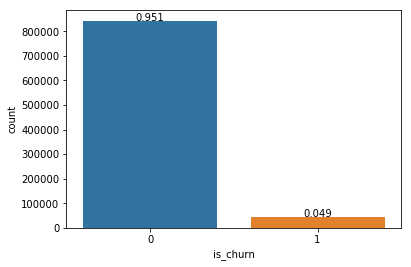

In [3]:
# creat df
tem = pd.DataFrame(train['is_churn'].value_counts())
tem['%'] = tem['is_churn']/len(train)
# plots
# left
ax = sns.countplot(train['is_churn'])
for index, row in tem.iterrows():
    ax.text(index, row.is_churn ,row['%'].round(3),color='black',ha='center')
# ax.yaxis.tick_left()
# right
'''ax2 = ax.twinx()
ax2.yaxis.tick_right()
ax2.set_ylabel('%')''';
# spacing
# ax2.grid(None)
plt.show()

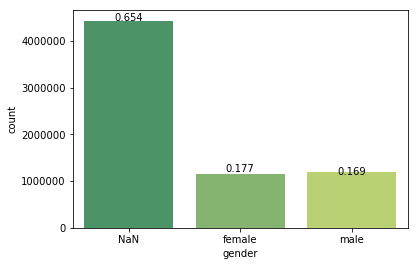

In [4]:
# creat df
df_gender = pd.DataFrame(members['gender'].fillna('NaN'))
plot_gender = pd.DataFrame(df_gender.gender.value_counts())
plot_gender['%'] = plot_gender['gender'] / len(members)
# plot
# left
ax = sns.countplot(data=df_gender,x='gender',palette=("summer"))
# set palette necessary ?
for i in range(3):
    # each position
    ax.text(i, plot_gender.iloc[i,0] ,plot_gender['%'].iloc[i].round(3),color='black',ha='center')
# ax.yaxis.tick_left()
# right
'''ax2 = ax.twinx()
ax2.yaxis.tick_right()
ax2.set_ylabel('%')''';
# spacing
# ax2.grid(None)
plt.show()

In [5]:
# df creation
reg_via_df = pd.DataFrame(members['registered_via'].value_counts()).reset_index()
reg_via_df = reg_via_df.rename(index=str, columns={"index": "registered_via", "registered_via": "count"})
# reg_via_df['%'] = reg_via_df['count'] / len(members)
reg_via_df.head()

,registered_via,count
0,4,2793213
1,3,1643208
2,9,1482863
3,7,805895
4,11,25047


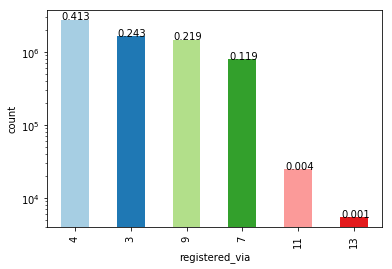

In [6]:
# seaborn countnot display values and sort suck
# ax = sns.countplot(members['registered_via'],palette=('Blues_d'))
ax = reg_via_df.head(6).plot.bar(x='registered_via',y='count',color=plt.cm.Paired(np.arange(len(reg_via_df))),legend=False)
ax.set_xlabel('registered_via')
ax.set_ylabel('count')
ax.set_yscale('log')
for p in ax.patches:
    ax.annotate('%.3f' % (p.get_height()/len(members) ), (p.get_x() * 1.005, p.get_height() * 1.005))